In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv('cleaned_data_final.csv')

# Transforming the data so that each row contains one response and one label
responses = data['Human_response'].tolist() + data['ChatGPT_3_5_response'].tolist()
labels = [0] * len(data['Human_response']) + [1] * len(data['ChatGPT_3_5_response'])
data_combined = pd.DataFrame({'response': responses, 'label': labels})

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data_combined['response'], data_combined['label'], test_size=0.2, random_state=42)

# Text vectorization
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Training the model
model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)

# Model evaluation
predictions = model.predict(X_test_vectorized)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       199
           1       0.93      0.87      0.90       201

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



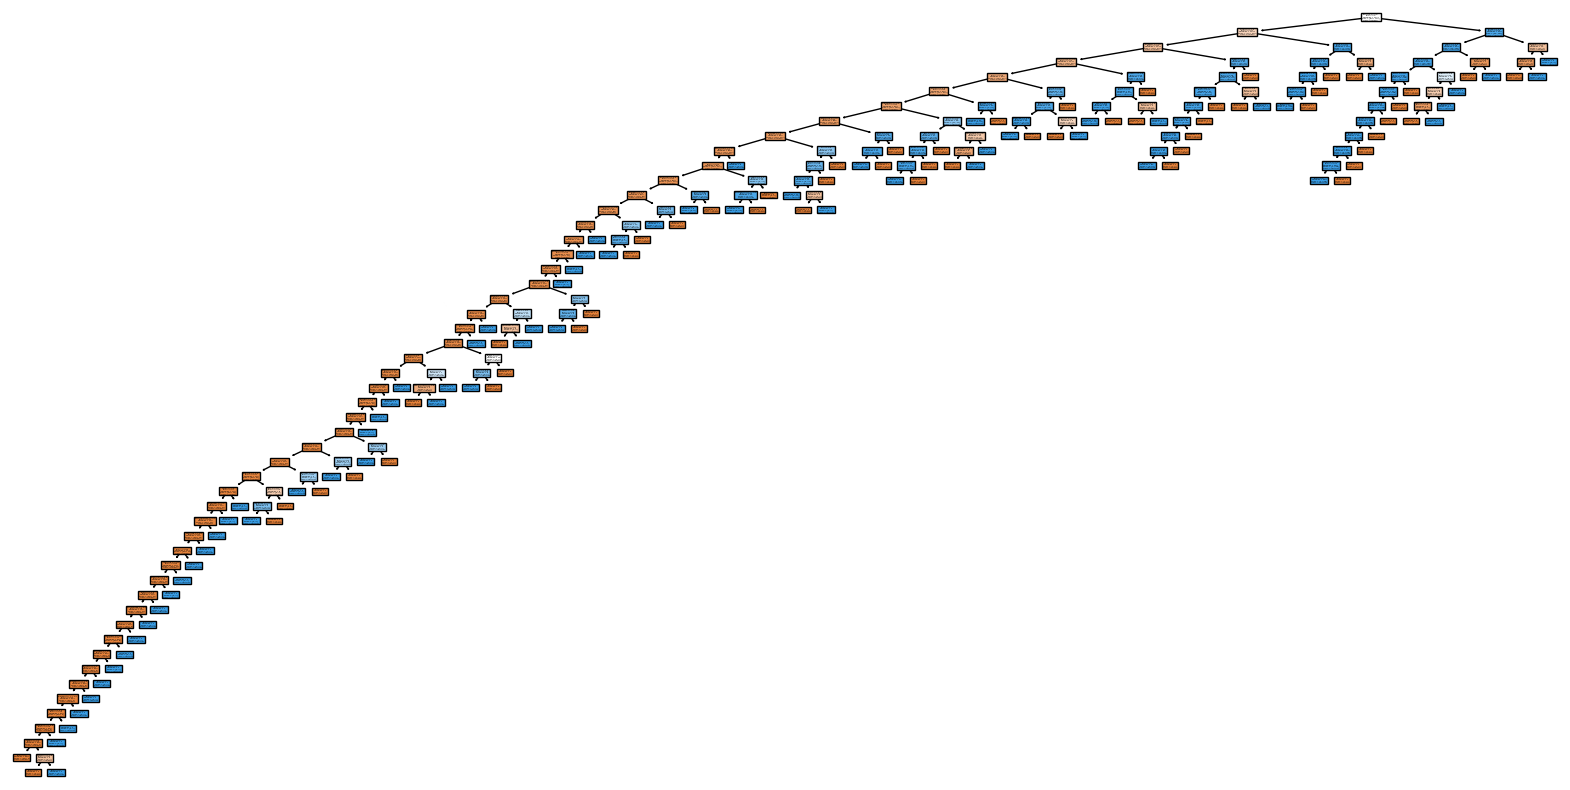

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizing the tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=vectorizer.get_feature_names_out(), class_names=['Human', 'ChatGPT'], filled=True)
plt.savefig('decision_tree.pdf', format='pdf') # Saving the plot to a PDF file
plt.show()

